# Libraries

In [882]:
import pandas as pd
import numpy as np
import sklearn
import skmultilearn

import scipy
from scipy.io import arff

from IPython.display import Image
from prettytable import PrettyTable

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import hamming_loss
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from skmultilearn.adapt import BRkNNaClassifier

# Import datasets

In [883]:
#"school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"

### Student performance dataset

In [884]:
student_mat=pd.read_csv('C:\\Users\\Dusica\\Downloads\\student\\student-mat.csv',sep=';')
student_por=pd.read_csv('C:\\Users\\Dusica\\Downloads\\student\\student-por.csv',sep=';')

In [885]:
#student=pd.concat([mat,por],join='left')
student = pd.merge(student_mat,student_por, on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

### Yeast dataset

In [886]:
yeast, meta = scipy.io.arff.loadarff('/Users/Dusica/Downloads/yeast/yeast.arff')
#yeast_test, meta = scipy.io.arff.loadarff('/Users/Dusica/Downloads/yeast/yeast-test.arff')
yeast = pd.DataFrame(yeast)
#yeast_test= pd.DataFrame(yeast_test)

In [887]:
listDF=[]
listDF.append(student)
listDF.append(yeast)
listDF.append(student_mat)
listDF.append(student_por)

In [888]:
type(listDF[2])

pandas.core.frame.DataFrame

### Descriptive statistics - Student performance

In [889]:
student.shape

(382, 53)

In [890]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_p,G2_p,G3_p
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [891]:
student.describe()

,age,Medu,Fedu,traveltime_x,studytime_x,failures_x,famrel_x,freetime_x,goout_x,Dalc_x,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_p,G2_p,G3_p
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,...,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,...,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [892]:
student.select_dtypes(include=['object']).describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian_x,schoolsup_x,...,higher_x,internet,romantic_x,guardian_y,schoolsup_y,famsup_y,paid_y,activities_y,higher_y,romantic_y
count,382,382,382,382,382,382,382,382,382,382,...,382,382,382,382,382,382,382,382,382,382
unique,2,2,2,2,2,5,5,4,3,2,...,2,2,2,3,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,...,yes,yes,no,mother,no,yes,no,yes,yes,no
freq,342,198,301,278,344,138,211,140,275,331,...,364,324,261,275,332,239,356,200,364,259


In [893]:
pd.concat([student.dtypes,student.isnull().sum()],axis=1)

,0,1
school,object,0
sex,object,0
age,int64,0
address,object,0
famsize,object,0
Pstatus,object,0
Medu,int64,0
Fedu,int64,0
Mjob,object,0
Fjob,object,0


In [894]:
a=[]
for i in range(len(student.isnull().sum())):
        if student.isnull().sum()[i]>0:
            a.append(student.isnull().sum()[i])
            print (student.columns[i],student.isnull().sum()[i])
print('Conclusion: There are ',len(a),' NULL values')

Conclusion: There are  0  NULL values


### Cleaning data

##### Categorical variables

In [895]:
student.select_dtypes(include=['object']).columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian_x', 'schoolsup_x', 'famsup_x', 'paid_x',
       'activities_x', 'nursery', 'higher_x', 'internet', 'romantic_x',
       'guardian_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y'],
      dtype='object')

#### Dummy variables

In [896]:
dummies=pd.get_dummies(student[student.select_dtypes(include=['object']).columns])

In [897]:
student_dummies=student.drop(student[student.select_dtypes(include=['object']).columns], axis=1)

In [898]:
student_dummies=student_dummies.join(dummies)

In [899]:
student_dummies.columns

Index(['age', 'Medu', 'Fedu', 'traveltime_x', 'studytime_x', 'failures_x',
       'famrel_x', 'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x',
       'absences_x', 'G1_m', 'G2_m', 'G3_m', 'traveltime_y', 'studytime_y',
       'failures_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y', 'Walc_y',
       'health_y', 'absences_y', 'G1_p', 'G2_p', 'G3_p', 'school_GP',
       'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_x_father', 'guardian_x_mother', 'guardian_x_other',
       'schoolsup_x_no', 'schoolsup_x_yes', 'famsup_x_no', 'famsup_x_yes',
       'paid_x_no', 'paid_x_yes', 'activities_x_no', 'activities_x_yes',
       'nursery_no', 'nursery_yes',

In [900]:
#Grade>=10 passed(1); Grade<10 failed(0)
for i in range(student_dummies.columns.get_loc("G1_p"),student_dummies.columns.get_loc("G3_p")+1):
    student_dummies.iloc[:,i] = np.where(student_dummies.iloc[:,i]<10, 0, 1)

In [901]:
#Grade>=10 passed(1); Grade<10 failed(0)
for i in range(student_dummies.columns.get_loc("G1_m"),student_dummies.columns.get_loc("G3_m")+1):
    student_dummies.iloc[:,i] = np.where(student_dummies.iloc[:,i]<10, 0, 1)

## yeast.shape

In [902]:
yeast.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'0'
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'


In [903]:
for i in range(yeast.columns.get_loc("Class1"),yeast.columns.get_loc("Class14")+1):
    yeast.iloc[:,i] =yeast.iloc[:,i] .replace(yeast.iloc[:,i] .unique()[1], 1)
    yeast.iloc[:,i]  =yeast.iloc[:,i] .replace(yeast.iloc[:,i] .unique()[0], 0)

In [904]:
for i in range(yeast.columns.get_loc("Class1"),yeast.columns.get_loc("Class14")+1):
      print(yeast.iloc[:,i].unique())

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [905]:
yeast.head(1)

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.04185,0.066938,-0.056617,...,0,0,0,0,0,0,0,0,0,0


In [906]:
#yeast.loc[:,[yeast.iloc[:,0], yeast.iloc[:,1]]]
y_yeast=yeast.loc[:,"Class1":"Class14"]

In [907]:
x_yeast=yeast.drop(y_yeast,axis=1)

In [908]:
x_yeast_train, x_yeast_test, y_yeast_train, y_yeast_test = train_test_split(x_yeast,y_yeast, test_size=0.3, random_state=42)

### 1. Problem transformation 
 ####   Binary Relevance 

In [909]:
classifier = BinaryRelevance(RandomForestClassifier())
classifier.fit(x_yeast_train, y_yeast_train)
predictions = classifier.predict(x_yeast_test)

In [910]:
x_yeast_test.shape

(726, 103)

In [911]:
predictions.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 1, 0]], dtype=int64)

In [912]:
t = PrettyTable(['Measures', 'Value'])
t.add_row(['Accuracy',accuracy_score(y_yeast_test,predictions)])
t.add_row(['Micro-Precision',precision_score(y_yeast_test,predictions,average='micro')])
t.add_row(['Macro-Recall',recall_score(y_yeast_test,predictions,average='macro')])
t.add_row(['Micro-Recall',recall_score(y_yeast_test,predictions,average='micro')])
t.add_row(['Micro-F1',f1_score(y_yeast_test,predictions,average='micro')])
t.add_row(['0/1 loss',zero_one_loss(y_yeast_test,predictions)])
t.add_row(['Hamming loss',hamming_loss(y_yeast_test,predictions)])
print(t) 

+-----------------+---------------------+
|     Measures    |        Value        |
+-----------------+---------------------+
|     Accuracy    |    0.115702479339   |
| Micro-Precision |    0.784490532011   |
|   Macro-Recall  |    0.301833996171   |
|   Micro-Recall  |    0.518319928508   |
|     Micro-F1    |    0.624215246637   |
|     0/1 loss    |    0.884297520661   |
|   Hamming loss  | 0.20611963793781976 |
+-----------------+---------------------+


In [913]:
type(predictions)

scipy.sparse.csc.csc_matrix

In [914]:
predictions = classifier.predict(x_yeast_test)

In [915]:
probas=classifier.predict_proba(x_yeast_test)
#[:,1]
probas.todense()

matrix([[ 0.1,  0.4,  0.1, ...,  0.5,  0.3,  0. ],
        [ 0. ,  0.5,  0.4, ...,  0.5,  0.3,  0. ],
        [ 0.6,  0.7,  0.4, ...,  0.2,  0.5,  0.1],
        ..., 
        [ 0.1,  0.1,  0.4, ...,  0.2,  0. ,  0. ],
        [ 0.2,  0.6,  0.2, ...,  0.4,  0. ,  0. ],
        [ 0.2,  0.6,  0.5, ...,  0.1,  0.7,  0. ]])

In [916]:
#from sklearn.metrics import confusion_matrix
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

roc_aucs=pd.DataFrame()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_yeast_test.iloc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    roc_aucs=roc_aucs.append(pd.concat([pd.Series(i),pd.Series(roc_auc[i])],axis=1))

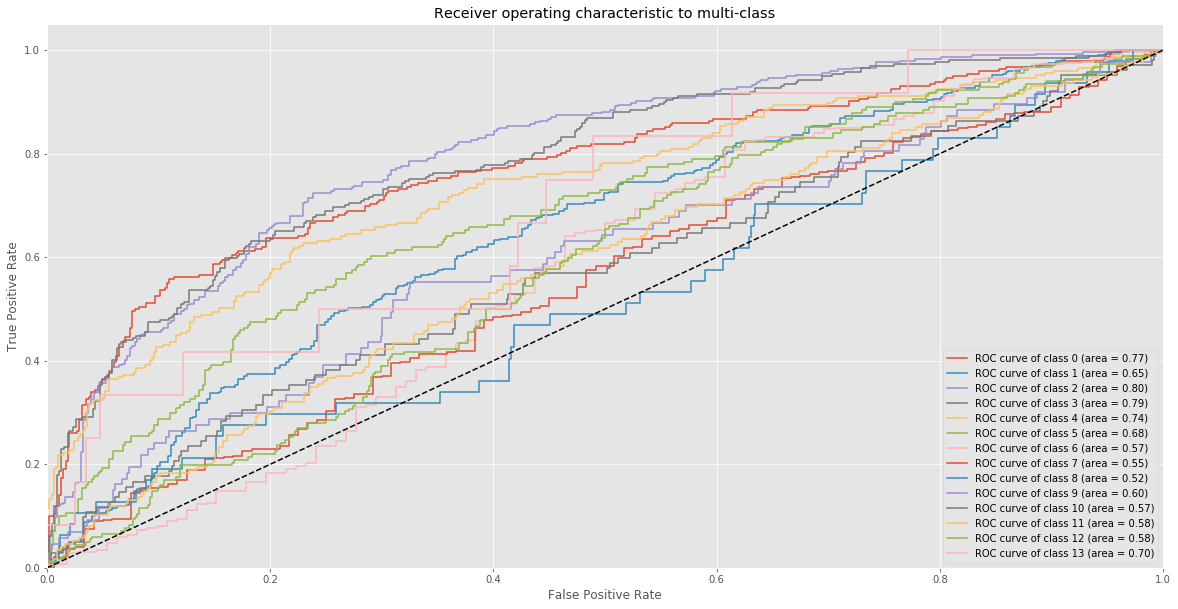

In [917]:
X = x_yeast_train
y = y_yeast_train
plt.figure(figsize=(20,10))


# Binarize the output
y = label_binarize(y, classes=y_yeast_train.columns)
n_classes = y.shape[1]
 
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=43))
y_score = classifier.fit(x_yeast_train, y_yeast_train).decision_function(x_yeast_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_yeast_test.iloc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])




# Plot ROC curve
#plt.figure()
#plt.plot(fpr["micro"], tpr["micro"],
 #        label='micro-average ROC curve (area = {0:0.2f})'
  #             ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [918]:
# HM functions

In [919]:
def GetWantedClasses(a,df):
    proba=pd.DataFrame()
    for i in range(len(a)):
        proba['Class'+str(a[i])]=pd.Series(df['Class'+str(a[i])])
    return proba

In [920]:
def GetClassNames(a):
        classNames=[]

        for i in range(len(a)):
   # print('Class'+str(df.iloc[a[i],0]))
          classNames.append('Class'+str(a[i]))
        return classNames

In [921]:
def SelectNROC_AUC_Scores(n,operation):
    roc_aucs=pd.DataFrame()
    for i in range(y_yeast_train.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_yeast_test.iloc[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        roc_aucs=roc_aucs.append(pd.concat([pd.Series(str(i+1)),pd.Series(fpr[i]),pd.Series(tpr[i]),pd.Series(roc_auc[i])],axis=1))
    roc_aucs.rename_axis({0:''},inplace=True)
    if operation==0:
        return roc_aucs.nlargest(n,columns=3)
    if operation==1:
        return roc_aucs.nsmallest(n,columns=3)

In [922]:
def plotOnlyN(n,operation):
    df=SelectNROC_AUC_Scores(n,operation)
    X = x_yeast_train
    y = GetWantedClasses(pd.to_numeric(df[0]).ravel(),y_yeast_train)

# Binarize the output

#This way is exactly the same
   # y = GetWantedClasses(pd.to_numeric(df[0]).ravel()).values
    
    
   # y = label_binarize(GetWantedClasses(pd.to_numeric(df[0]).ravel()).values, classes=pd.Index(GetClassNames(pd.to_numeric(df[0]).ravel()))) 
    y = label_binarize(GetWantedClasses(pd.to_numeric(df[0]).ravel(),y_yeast_train),classes=pd.Index(GetClassNames(pd.to_numeric(df[0]).ravel())))

    n_classes = y.shape[1]
 
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=43))
    y_score = classifier.fit(x_yeast_train, GetWantedClasses(pd.to_numeric(df[0]).ravel(),y_yeast_train)).decision_function(x_yeast_test)

# Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
     #   fpr[i], tpr[i], _ = roc_curve(y_yeast_test.iloc[:, i], y_score[:, i])
        fpr[i], tpr[i], _ = roc_curve(GetWantedClasses(pd.to_numeric(df[0]).ravel(),y_yeast_test).iloc[:, i], y_score[:, i])
      #  roc_auc[i] = df.iloc[i,3]
        #fpr[i], tpr[i], _ =df.iloc[i,1:4]
        
        #roc_auc[i] = auc(df.iloc[i,1], df.iloc[i,2])
        roc_auc[i] = auc(fpr[i], tpr[i])

        
        
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(pd.to_numeric(df.iloc[i,0]), roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    return plt.show()

### TOP N ROC scores

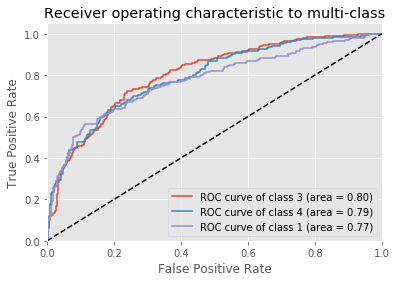

In [923]:
plotOnlyN(3,0)

### WORST N ROC scores

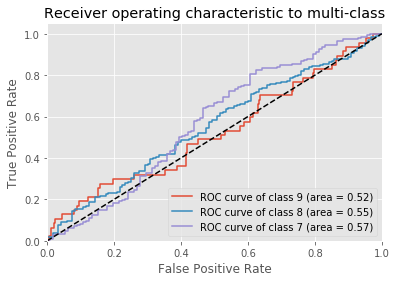

In [924]:
plotOnlyN(3,1)

### 2. Algorithm adaptation

In [817]:
x_yeast_train_sp=scipy.sparse.csr_matrix(x_yeast_train.values)
y_yeast_train_sp=scipy.sparse.csr_matrix(y_yeast_train.values)
x_yeast_test_sp=scipy.sparse.csr_matrix(x_yeast_test.values)
y_yeast_test_sp=scipy.sparse.csr_matrix(y_yeast_test.values)

In [818]:
classifier = MLkNN(k=10)

# train
classifier.fit(x_yeast_train_sp, y_yeast_train_sp)

# predict
predictions = classifier.predict(x_yeast_test_sp)
#predict_proba


t = PrettyTable(['Measures', 'Value'])
t.add_row(['Accuracy',accuracy_score(y_yeast_test_sp,predictions)])
t.add_row(['Precision',precision_score(y_yeast_test_sp,predictions,average='micro')])
t.add_row(['Recall',recall_score(y_yeast_test_sp,predictions,average='micro')])
t.add_row(['0/1 loss',zero_one_loss(y_yeast_test_sp,predictions)])
t.add_row(['F1',f1_score(y_yeast_test_sp,predictions,average='micro')])
print(t) 

+-----------+----------------+
|  Measures |     Value      |
+-----------+----------------+
|  Accuracy | 0.18870523416  |
| Precision | 0.742685671418 |
|   Recall  | 0.58981233244  |
|  0/1 loss | 0.81129476584  |
|     F1    | 0.657479661298 |
+-----------+----------------+


In [819]:
classifier = BRkNNaClassifier(k=10)

# train
classifier.fit(x_yeast_train_sp, y_yeast_train_sp)

# predict
predictions = classifier.predict(x_yeast_test_sp)
#predict_proba

t = PrettyTable(['Measures', 'Value'])
t.add_row(['Accuracy',accuracy_score(y_yeast_test,predictions)])
t.add_row(['Precision',precision_score(y_yeast_test,predictions,average='micro')])
t.add_row(['Recall',recall_score(y_yeast_test,predictions,average='micro')])
t.add_row(['0/1 loss',zero_one_loss(y_yeast_test,predictions)])
t.add_row(['F1',f1_score(y_yeast_test,predictions,average='micro')])
print(t) 

+-----------+----------------+
|  Measures |     Value      |
+-----------+----------------+
|  Accuracy | 0.125344352617 |
| Precision | 0.876732312181 |
|   Recall  | 0.358057789693 |
|  0/1 loss | 0.874655647383 |
|     F1    | 0.508460236887 |
+-----------+----------------+


# Multi class classification
# 1. Problem transformation methods

##     a)The binary relevance method (BR)
the simplest problem transformation method
BR learns a binary classifier for each label

--- labels are predicted independently of each other and label dependencies are not taken into account.

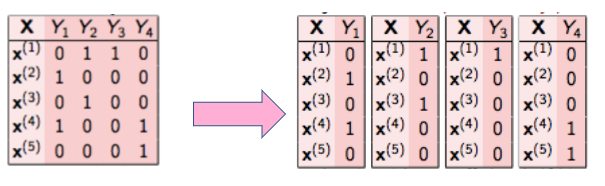

In [820]:
Image(filename="C:\\Users\\Dusica\\Desktop\\RESURSII ZA MLC\\BinaryRelevance2.png",width=500, height=300)

### TARGET LABELS [G1, G2, G3]

In [821]:
x=student_dummies.drop(['G1','G2','G3'],axis=1)

ValueError: labels ['G1' 'G2' 'G3'] not contained in axis

In [ ]:
y=student_dummies[['G1','G2','G3']]

In [ ]:
a_train, a_test, b_train, b_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
#classifier = BinaryRelevance(RandomForestClassifier())
#classifier = BinaryRelevance(GaussianNB())
classifier = BinaryRelevance(LogisticRegression())

# train
classifier.fit(a_train, b_train)

# predict
predictions = classifier.predict(a_test)

In [ ]:
predictions.todense()[0:5]

In [ ]:
t = PrettyTable(['Measures', 'Value'])
t.add_row(['Accuracy',accuracy_score(b_test,predictions)])
t.add_row(['Precision',precision_score(b_test,predictions,average='macro')])
t.add_row(['Recall',recall_score(b_test,predictions,average='macro')])
t.add_row(['0/1 loss',zero_one_loss(b_test,predictions)])
t.add_row(['F1',f1_score(b_test,predictions,average='macro')])
print(t)

## b) Classifier Chains
 -The first classifier is trained just on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain.

In [ ]:
Image(filename="C:\\Users\\Dusica\\Desktop\\RESURSII ZA MLC\\ClassifierChains.png",width=700, height=700)

### TARGET LABELS [G1, G2, G3]

In [ ]:
classifier = ClassifierChain(LogisticRegression())

# train
classifier.fit(a_train, b_train)

# predict
predictions = classifier.predict(a_test)
 
 
t = PrettyTable(['Measures', 'Value'])
t.add_row(['Accuracy',accuracy_score(b_test,predictions)])
t.add_row(['Precision',precision_score(b_test,predictions,average='macro')])
t.add_row(['Recall',recall_score(b_test,predictions,average='macro')])
t.add_row(['0/1 loss',zero_one_loss(b_test,predictions)])
t.add_row(['F1',f1_score(b_test,predictions,average='macro')])
print(t) 

In [ ]:
#Nested stacking
#proba

In [ ]:
Image(filename="C:\\Users\\Dusica\\Desktop\\RESURSII ZA MLC\\NestedStacking.png",width=700, height=700)

In [ ]:
x1_ns=x
y1_ns=y['G1']

In [ ]:
predicted_G1 = cross_val_predict(LogisticRegression(), x1_ns, y1_ns, cv=2)
accuracy_score(y1_ns, predicted_G1) 

In [ ]:
x1_ns['predicted_G1']=predicted_G1
y2_ns=y['G2']

In [ ]:
predicted_G2 = cross_val_predict(LogisticRegression(), x1_ns, y2_ns, cv=2)
accuracy_score(y2_ns, predicted_G2) 

In [ ]:
x1_ns['predicted_G2']=predicted_G2
y3_ns=y['G3']

In [ ]:
predicted_G3 = cross_val_predict(LogisticRegression(), x1_ns, y3_ns, cv=2)
accuracy_score(y3_ns, predicted_G3) 

In [ ]:
#Dependent binary relevance - DBR
#proba

In [ ]:
Image(filename="C:\\Users\\Dusica\\Desktop\\RESURSII ZA MLC\\dbr.png",width=700, height=700)

In [ ]:
x1_dbr=student_dummies.drop('G1',axis=1)
y1_dbr=y['G1']

In [ ]:
predicted_G1 = cross_val_predict(LogisticRegression(), x1_dbr, y1_dbr, cv=5)
accuracy_score(y1_dbr, predicted_G1) 

In [ ]:
x2_dbr=student_dummies.drop('G2',axis=1)
y2_dbr=y['G2']

In [ ]:
predicted_G2 = cross_val_predict(LogisticRegression(), x2_dbr, y2_dbr, cv=5)
accuracy_score(y2_dbr, predicted_G2) 

In [ ]:
x3_dbr=student_dummies.drop('G3',axis=1)
y3_dbr=y['G3']

In [ ]:
predicted_G3 = cross_val_predict(LogisticRegression(), x3_dbr, y3_dbr, cv=5)
accuracy_score(y3_dbr, predicted_G3) 

## c) Label Powerset
It transforms the problem into a multi-class problem with one multi-class classifier which is trained on all unique label combinations found in the training data.
x1 and x4 have the same labels, similarly, x3 and x6 have the same set of labels. Label powerset transforms this problem into a single multi-class problem as shown below.
Disadvantage:  The only disadvantage of this is that as the training data increases, number of classes also inreases, and measure values decrease.  

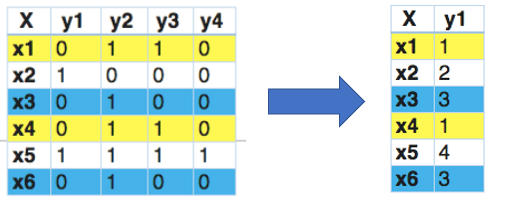

In [605]:
Image(filename="C:\\Users\\Dusica\\Desktop\\RESURSII ZA MLC\\LabelPowerset2.png",width=500, height=300)

### TARGET LABELS [G1, G2, G3]

In [606]:
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(a_train, b_train)

# predict
predictions = classifier.predict(a_test)

t = PrettyTable(['Measures', 'Value'])
t.add_row(['Accuracy',accuracy_score(b_test,predictions)])
t.add_row(['Precision',precision_score(b_test,predictions,average='macro')])
t.add_row(['Recall',recall_score(b_test,predictions,average='macro')])
t.add_row(['0/1 loss',zero_one_loss(b_test,predictions)])
t.add_row(['F1',f1_score(b_test,predictions,average='macro')])
print(t) 

+-----------+----------------+
|  Measures |     Value      |
+-----------+----------------+
|  Accuracy | 0.588235294118 |
| Precision | 0.664059138854 |
|   Recall  | 0.922625353928 |
|  0/1 loss | 0.411764705882 |
|     F1    | 0.772061868226 |
+-----------+----------------+


# 2. Algorithm adaptation methods

Adapted algorithm, as the name suggests, adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.

multi-label version of kNN is represented by MLkNN

### TARGET LABELS [G1, G2, G3]

In [621]:
a_train_sp=scipy.sparse.csr_matrix(a_train.values)
b_train_sp=scipy.sparse.csr_matrix(b_train.values)
a_test_sp=scipy.sparse.csr_matrix(a_test.values)
b_test_sp=scipy.sparse.csr_matrix(b_test.values)

In [622]:
classifier = MLkNN(k=20)

# train
classifier.fit(a_train_sp, b_train_sp)

# predict
predictions = classifier.predict(a_test_sp)
#predict_proba

 
t = PrettyTable(['Measures', 'Value'])
t.add_row(['Accuracy',accuracy_score(b_test_sp,predictions)])
t.add_row(['Precision',precision_score(b_test_sp,predictions,average='macro')])
t.add_row(['Recall',recall_score(b_test_sp,predictions,average='macro')])
t.add_row(['0/1 loss',zero_one_loss(b_test_sp,predictions)])
t.add_row(['F1',f1_score(b_test_sp,predictions,average='macro')])
print(t) 

+-----------+----------------+
|  Measures |     Value      |
+-----------+----------------+
|  Accuracy | 0.487394957983 |
| Precision | 0.619729708547 |
|   Recall  | 0.953853604539 |
|  0/1 loss | 0.512605042017 |
|     F1    | 0.74959880321  |
+-----------+----------------+


In [623]:
classifier = BRkNNaClassifier(k=4)

# train
classifier.fit(a_train_sp, b_train_sp)

# predict
predictions = classifier.predict(a_test_sp)
#predict_proba


t = PrettyTable(['Measures', 'Value'])
t.add_row(['Accuracy',accuracy_score(b_test,predictions)])
t.add_row(['Precision',precision_score(b_test,predictions,average='macro')])
t.add_row(['Recall',recall_score(b_test,predictions,average='macro')])
t.add_row(['0/1 loss',zero_one_loss(b_test,predictions)])
t.add_row(['F1',f1_score(b_test,predictions,average='macro')])
print(t) 

+-----------+----------------+
|  Measures |     Value      |
+-----------+----------------+
|  Accuracy | 0.504201680672 |
| Precision | 0.597442313039 |
|   Recall  | 0.951324737871 |
|  0/1 loss | 0.495798319328 |
|     F1    | 0.733667116126 |
+-----------+----------------+


# 3. Ensemble Approaches?
Ensemble always produces better results. Scikit-Multilearn library provides different ensembling classification functions, which you can use for obtaining better results.

In [153]:
#enables the %%R magic, load not necessary if you've already done this
#%load_ext rpy2.ipython
%reload_ext rpy2.ipython

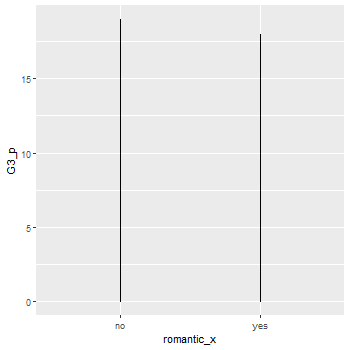

In [160]:
%%R -i student -w 5 -h 5 --units in -r 70

install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
ggplot(student, aes(x=romantic_x, y=G3_p)) + geom_line()
#python+R playtime

In [209]:
!pip install scikit-multilearn

In [192]:
!pip install liac-arff

  Running setup.py bdist_wheel for liac-arff: started
  Running setup.py bdist_wheel for liac-arff: finished with status 'done'
  Stored in directory: C:\Users\Dusica\AppData\Local\pip\Cache\wheels\fa\05\89\ad13dcf092046e2ea86beec50db9ad5ce8a3ba0c4d00489579
Successfully built liac-arff


In [208]:
!pip install future

  Running setup.py bdist_wheel for future: started
  Running setup.py bdist_wheel for future: finished with status 'done'
  Stored in directory: C:\Users\Dusica\AppData\Local\pip\Cache\wheels\c2\50\7c\0d83b4baac4f63ff7a765bd16390d2ab43c93587fac9d6017a
Successfully built future


In [226]:
!pip install whichcraft

In [382]:
!pip install prettytable

  Running setup.py bdist_wheel for prettytable: started
  Running setup.py bdist_wheel for prettytable: finished with status 'done'
  Stored in directory: C:\Users\Dusica\AppData\Local\pip\Cache\wheels\b6\90\7b\1c22b89217d0eba6d5f406e562365ebee804f0d4595b2bdbcd
Successfully built prettytable


In [ ]:
#!pip install dvc